# Shruti Santosh Chavan , BE(IT)

In [ ]:
# Use Autoencoder to implement anomaly detection. Build the model by using:
#a. Import required libraries
#b. Upload / access the dataset
#c. Encoder converts it into latent representation
#d. Decoder networks convert it back to the original input
#e. Compile the models with Optimizer, Loss, and Evaluation Metrics

# a. Import required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# b. Upload / access the dataset

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data: normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Select only the "1" digit as normal data for training
normal_data = x_train[y_train == 1]

In [4]:
# Define the Autoencoder architecture
input_dim = normal_data.shape[1]
encoding_dim = 32  # Dimension of the latent representation

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)

In [5]:
# Decoder
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Separate the encoder model for anomaly detection
encoder_model = Model(inputs=input_layer, outputs=encoder)

In [6]:
# Compile the autoencoder
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the autoencoder on the normal data
autoencoder.fit(normal_data, normal_data, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2054 - val_loss: 0.1261
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0673 - val_loss: 0.0331
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0302 - val_loss: 0.0258
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0252 - val_loss: 0.0220
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0218 - val_loss: 0.0194
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0195 - val_loss: 0.0176
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0177 - val_loss: 0.0159
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0161 - val_loss: 0.0146
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0150 - val_loss: 0.0139
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0143 - val_loss: 0.0133
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0138 - val_loss: 0.0129
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - val

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


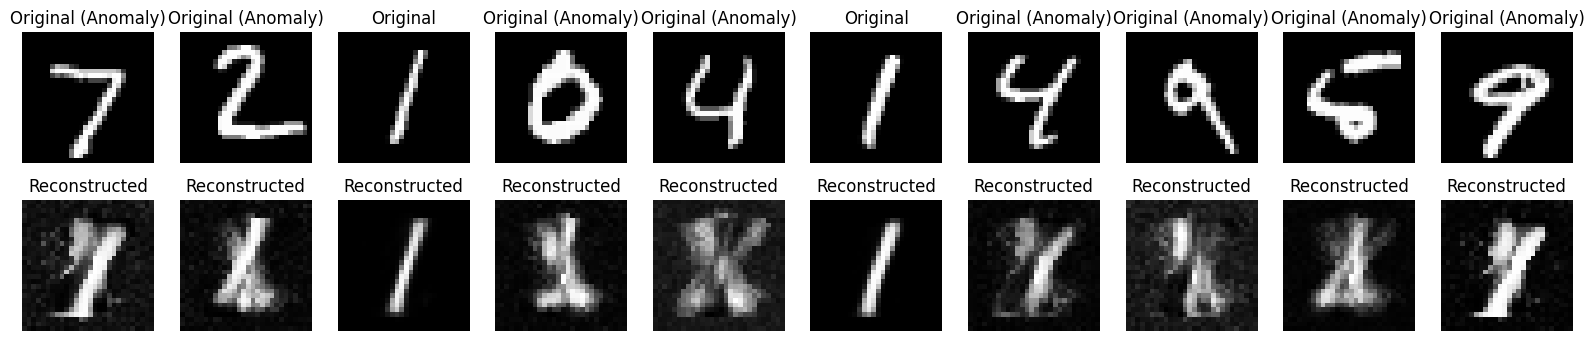

In [7]:
# Predict on the test data
reconstructed = autoencoder.predict(x_test)

# Compute reconstruction error
mse = np.mean(np.power(x_test - reconstructed, 2), axis=1)

# Set a threshold for anomaly detection (this can be adjusted)
threshold = 0.01

# Identify anomalies
anomalies = mse > threshold

# Visualize some results
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original" + (" (Anomaly)" if anomalies[i] else ""))
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()